# Customer Analytic Report
by: Robert Russ

Decription of the Dataset:

The dataset was derived from: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
This dataset is an unidentified auto insurance company's customers' information.  The dataset includes 24 variables.  

There are two potential target variables which are customer lifetime value (C.L.V.) and response.  According to Wikipedia, C.L.V. refers to a prediction of the net profit attributed to the entire future relationship with a customer.  This is an important metric for an insurance company because this metric can help the insurance company understand whether customers will stay or find another insurance company.  Companies make more profit in retaining customers as opposed to getting new customers.  This is called customer churn.  I will propose to do further research on predicting C.L.V.  In my prediction of C.L.V., I will look at using customer demographic data to predict C.L.V.  Most C.L.V. predicton models use transactional data.  In this data set, the data does not include customer tranactions.  This will be done in another project.  I will look at creating customer segments based on their C.L.V. and customer demographics.  

The other target variable is response which refers to customers' response to the company's marketing strategies. One important predictor variable labeled renewal offer type is an attempt by the company to offer their customers a product to keep them.  Another important predictor variable I will consider in this analysis is sales channel.  There are two more important variables we will focus on in the analysis which are vehicle class and vehicle size.

This analysis will focus on the response or engagement rate of the customers.  In another analysis, I will predict engagement rate, C.L.V., and rank the importance of the features.

In [40]:
# Loading Python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading data set from github.
market_df = pd.read_csv('https://raw.githubusercontent.com/rruss2/customer_value_analysis/master/marketing_customer_value_analysis.csv')
# Displaying the first five rows and column headings.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# Get the shape of the dataset.
# There are 9,134 rows and 24 columns.
market_df.shape

(9134, 24)

In [5]:
# Desciption of the data types of each variable and count of each variable.
# The variables have floating, string, and integer values in them.
# Checking for missing values.
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [6]:
# Convert the response target variable to a numerical variable.
market_df.Response = (market_df.Response == 'Yes').astype(int)

In [7]:
# Response variable changed from "No" to 0 and "Yes" to 1.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Engagement Rates

Since this analysis is focused on marketing strategies, there are severval variables I will find more important in engagement rates.  They are the offer types, offer type by vehicle class, sales channels in engaging the customers, and sales channel by vehicle size.  

In [10]:
# total number of no and yes.
market_df.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

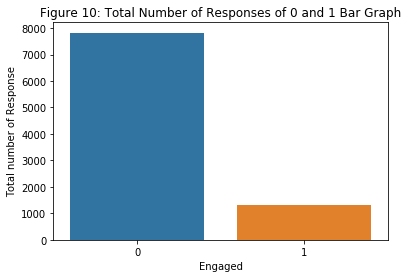

In [15]:
# bar graph of the responses of no and yes.
sns.countplot('Response', data = market_df)
plt.xlabel('Engaged')
plt.ylabel('Total number of Response')
plt.title('Figure 10: Total Number of Responses of 0 and 1 Bar Graph')
plt.show()

In [17]:
# Percent breakdown of the responses of no and yes or engagment rates.
market_df.groupby('Response').count()['Customer']/market_df.shape[0]

Response
0    0.856799
1    0.143201
Name: Customer, dtype: float64

# Engagement Rates by Renew Offer Types

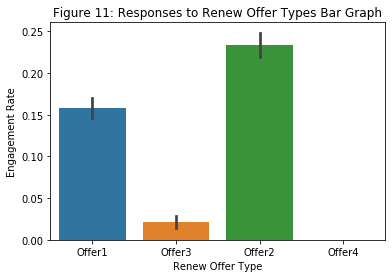

In [16]:
# Engagement rates among offer types.
sns.barplot(x="Renew Offer Type", y="Response", data=market_df)
plt.ylabel('Engagement Rate')
plt.title('Figure 11: Responses to Renew Offer Types Bar Graph')
plt.show()

In [21]:
# Creating a new dataframe to show engagement rates of vehicle classes
# in each offer type.
offer_type_df = market_df.loc[market_df['Response'] == 1].groupby([
    'Renew Offer Type',
    'Vehicle Class']).count()['Customer']/market_df.groupby('Renew Offer Type').count()['Customer']

In [23]:
# Creating a more readable table of offer_type_df.
offer_type_df = offer_type_df.unstack().fillna(0)
offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


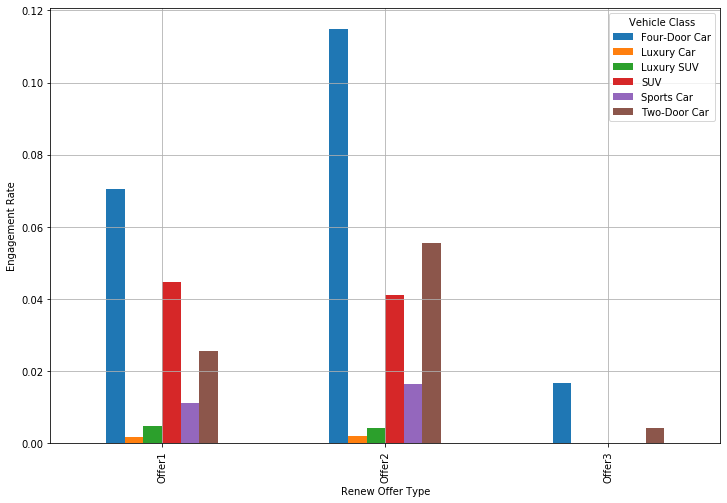

In [28]:
# Creating a bar plot to visualize the table.
offer_type_df.plot(kind='bar', figsize=(12, 8), grid='True')
plt.ylabel('Engagement Rate')
plt.show()

In the bar plot, we can see customers with four door cars have the highest engagement in all three offers.  We can also see in the both bar plots that offer 2 had the highest customer engagement rates.

# Engagement Rates by Sales Channels

In [32]:
# Creating a new dataframe to show engagement rates of sales channel.
sales_channel_df = market_df.loc[market_df['Response'] == 1].groupby([
    'Sales Channel']).count()['Customer']/market_df.groupby('Sales Channel').count()['Customer']
sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

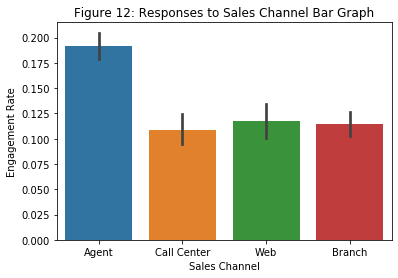

In [29]:
# Engagement rates by sales channels.
sns.barplot(x="Sales Channel", y="Response", data=market_df)
plt.ylabel('Engagement Rate')
plt.title('Figure 12: Responses to Sales Channel Bar Graph')
plt.show()

We can see that the sales channel with the highest engagment rate is Agent.

In [34]:
# Engagement rate by vehicle size in each sales channel
sales_channel_df = market_df.loc[market_df['Response'] == 1].groupby([
    'Sales Channel', 'Vehicle Size']).count()['Customer']/market_df.groupby('Sales Channel').count()['Customer']

In [37]:
# Creating a readable table.
sales_channel_df = sales_channel_df.unstack().fillna(0)
sales_channel_df

Sales Channel,Agent,Branch,Call Center,Web
Vehicle Size,,,,
Large,0.020708,0.021036,0.013598,0.013585
Medsize,0.144953,0.074795,0.067989,0.095094
Small,0.025884,0.018699,0.027195,0.009057


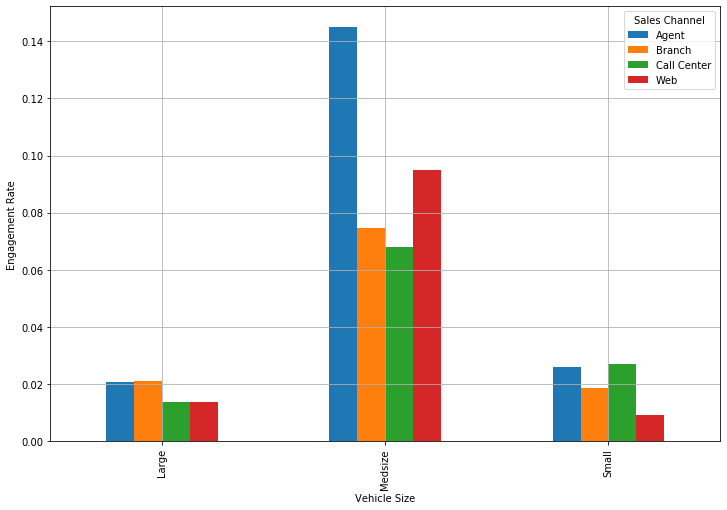

In [39]:
# Creating a bar plot to visualize the table.
sales_channel_df.plot(kind='bar', figsize=(12, 8), grid='True')
plt.ylabel('Engagement Rate')
plt.show()

Based on the bar plot, we can see that customers with medsize vehicles have the highest engagement rate with all the sale channels.  We can see that in medsize the agent sales channel has the highest engagement rate.  In the other two sizes, the agent sales channel is not the highest engagement rate.

# Customer Segmentatation

In [41]:
# Summary statistics of C.L.V.
market_df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

Based on the summary statistics, we can see there are possible outliers.  As a result, I will use the median not the mean to classify customers as high-CLV or low-CLV.  I will classify customers with CLV higher than the median CLV as high-CLV customers and customers with CLV lower than the median as low-CLV customers.

In [45]:
market_df['CLV Segment'] = market_df['Customer Lifetime Value'].apply(lambda x: 'High' if x > market_df['Customer Lifetime Value'].median() else 'Low')

In [46]:
# Summary statistics of Income.
market_df['Income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

I will do the same thing I did with CLV with income.

In [47]:
market_df['Income Segment'] = market_df['Income'].apply(lambda x: 'High' if x > market_df['Income'].median() else 'Low')

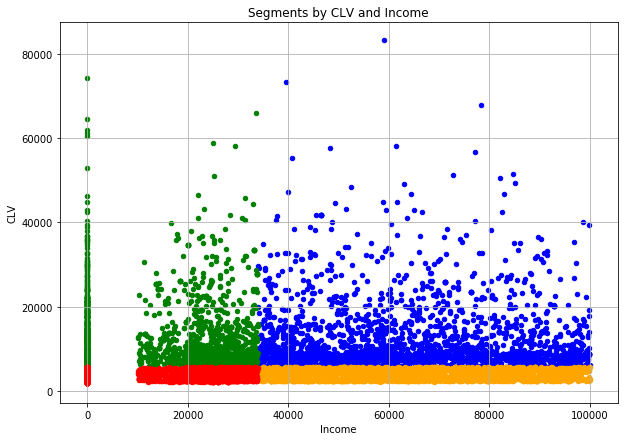

In [53]:
ax = market_df.loc[
    (market_df['CLV Segment'] == 'High') & (market_df['Income Segment'] == 'High')
].plot.scatter(
    x='Income',
    y='Customer Lifetime Value',
    logy=False,
    color='blue'
)

market_df.loc[
    (market_df['CLV Segment'] == 'Low') & (market_df['Income Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Income',
    y='Customer Lifetime Value',
    logy=False,
    color='orange'
)

market_df.loc[
    (market_df['CLV Segment'] == 'High') & (market_df['Income Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Income',
    y='Customer Lifetime Value',
    logy=False,
    color='green'
)

market_df.loc[
    (market_df['CLV Segment'] == 'Low') & (market_df['Income Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Income',
    y='Customer Lifetime Value',
    logy=False,
    color='red',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV')
ax.set_xlabel('Income')

ax.set_title('Segments by CLV and Income')

plt.show()

The scatter plot of segmenting the customers into their income and CLV displays the high CLV and Income customers are blue, high CLV and Low Income are green, low CLV and high Income customers are orange, and low CLV and Income customers are red.  These segments give us important infomation about the customers.  We can say that not all customers with a high income will give us high CLV.  We can also say that not customers with low incomes with high us low CLV.  We can begin discussing some marketing strategies in addressing the high income customers with low CLV in order to increase their CLV.

# Engagment Rates by Customer Segments

In [57]:
# Creating a table of the engagement rates of the segments.
engagment_rates_by_segment_df = market_df.loc[
    market_df['Response'] == 1
].groupby(
    ['CLV Segment', 'Income Segment']
).count()['Customer']/market_df.groupby(
    ['CLV Segment', 'Income Segment']
).count()['Customer']

engagment_rates_by_segment_df

CLV Segment  Income Segment
High         High              0.125427
             Low               0.145815
Low          High              0.156545
             Low               0.145842
Name: Customer, dtype: float64

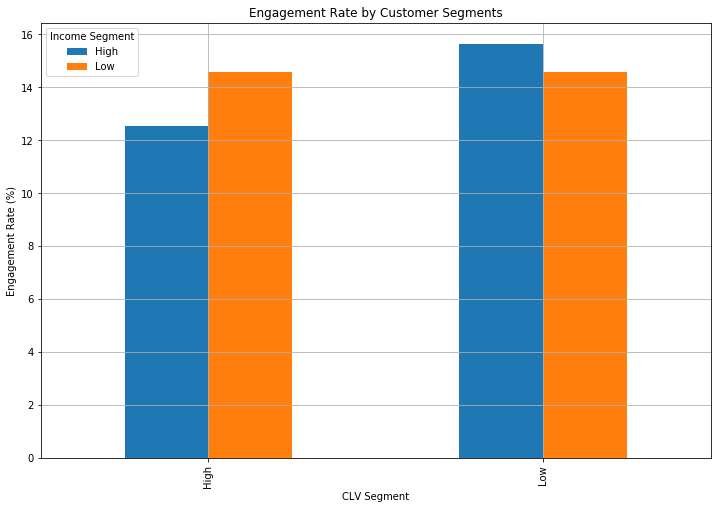

In [61]:
# Creating a bar plot to visualize the table.
ax = (engagment_rates_by_segment_df.unstack()*100).plot(kind='bar', figsize=(12, 8), grid='True')
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rate by Customer Segments')
             
plt.show()

The engagement rates among the low CLV segments seem to be higher than the high CLV segments.  I think this is an interesting insight.  One question I have is, Why are low CLV customers some much more engaged in marketing efforts than high CLV customers?  Does the marketing team need to focus their attention more on high CLV versus low CLV customers?  I wonder if the high CLV customers are loyal customers, therefore willing to spend more with the auto insurance company.  These customers may not need as much marketing and less engaged in marketing efforts.  This is purely spectulation and will need to investigate this more.